In [22]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [23]:
Pokemon = pd.read_csv("../files/All_Pokemon.csv")

In [24]:
Pokemon = Pokemon.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2'})

In [25]:
Pokemon.head()

,Number,Name,Type_1,Type_2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [26]:
def plot_tree_classification(model, features, class_names,filename="decision_tree"):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=features,
                                    class_names=class_names,
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render(filename)

    # Display in the notebook
    return graph

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

In [27]:

features = ['HP', 'Att', 'Def','Spa', 'Spd', 'Spe']
Pokemon_train, Pokemon_test = train_test_split(Pokemon, test_size=0.3, random_state=42, stratify=Pokemon['Type_1'])
dt = DecisionTreeClassifier(max_depth=1)


## Decision Tree: Predicting Type 1 based on Pokémon stats

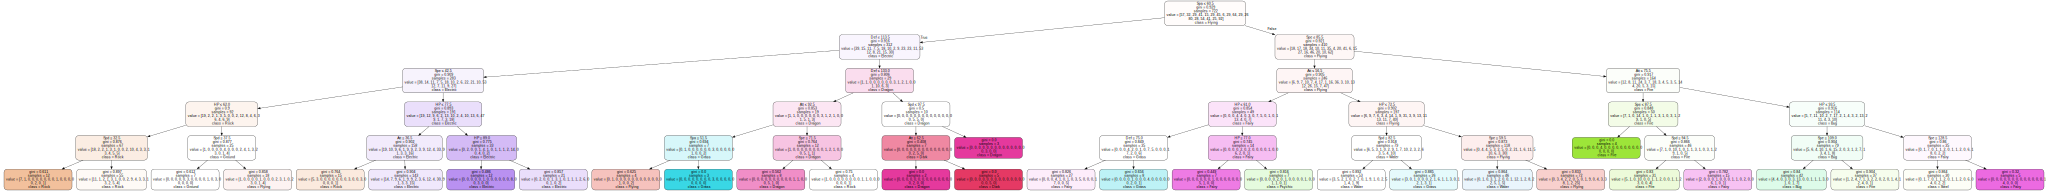

In [34]:
dt.fit(Pokemon_train[features], Pokemon_train['Type_1'])
plot_tree_classification(dt, features, Pokemon_train['Type_1'].unique())

In [29]:
predictionsOnTrainset = dt.predict(Pokemon_train[features])
predictionsOnTestset = dt.predict(Pokemon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, Pokemon_train.Type_1)
accuracyTest = calculate_accuracy(predictionsOnTestset, Pokemon_test.Type_1)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.1592797783933518
Accuracy on test set 0.14838709677419354


The results we get in this test are wildly dependent on the max depth of the tree, hence a max depth of one as shown above. We can conclude that there is a case of overfitting. For example, the following results with no max depth are:

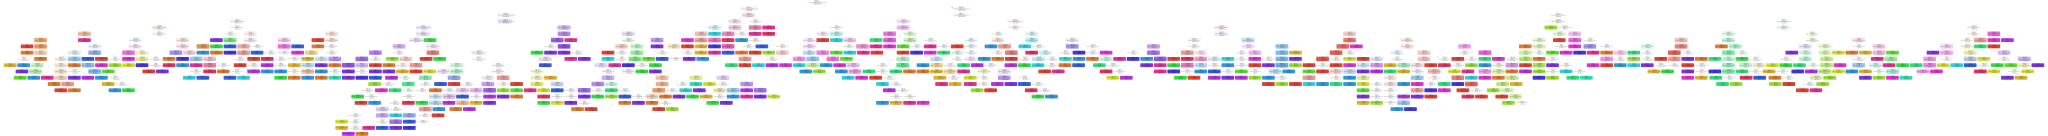

In [30]:
dt = DecisionTreeClassifier()
dt.fit(Pokemon_train[features], Pokemon_train['Type_1'])
plot_tree_classification(dt, features, Pokemon_train['Type_1'].unique())


In [31]:
predictionsOnTrainset = dt.predict(Pokemon_train[features])
predictionsOnTestset = dt.predict(Pokemon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, Pokemon_train.Type_1)
accuracyTest = calculate_accuracy(predictionsOnTestset, Pokemon_test.Type_1)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9833795013850416
Accuracy on test set 0.15483870967741936


The accuracy of the train set is around 98% but the accuracy of the test set stayed the same. My guess is that there is too much variance in the data to make a good decision tree. A tree with a max depth of 5 for example does not give a very big performance gain:

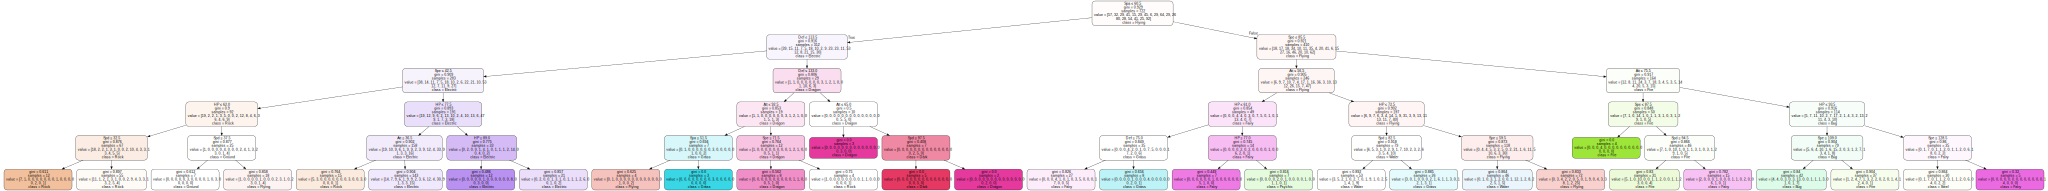

In [32]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(Pokemon_train[features], Pokemon_train['Type_1'])
plot_tree_classification(dt, features, Pokemon_train['Type_1'].unique())

In [33]:
predictionsOnTrainset = dt.predict(Pokemon_train[features])
predictionsOnTestset = dt.predict(Pokemon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, Pokemon_train.Type_1)
accuracyTest = calculate_accuracy(predictionsOnTestset, Pokemon_test.Type_1)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.29916897506925205
Accuracy on test set 0.16451612903225807


Sadly a decision tree is not a good model for this data.